# Homework 8: Generalizations of linear models.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(123)

# 1. Logistic exposure

Suppose that the probability that someone comes down with the flu
depends on two things:
- the amount of exposure to others with an active case of the flu
    (measured in units of person-minutes), and
- how well their antibodies attach to the flu circulating that year
    (measured in units of "binding antibody units" (BAU) per mL).

**(a)** Suppose that the probability that someone with total exposure $E$ person-minutes
    and antibody binding $B$ BAU/mL is
    $$  p(E, B) = \frac{1}{1 + e^{-(a E + b B + c)}}, $$
    with $a=1/100$, $b=-1/300$, and $c=-3$.
    Write a function that, given arrays of the same length of $E$ and $B$ values,
    returns (i.e., simulates) an array of 0's and 1's, one for each $E, B$ pair,
    so that the $i^\text{th}$ entry is 1 with probability $p(E_i, B_i)$.
    (A "1" in the $i^\text{th}$ entry will indicate that the $i^\text{th}$ person caught the flu.)
    
**(b)** Create one simulated dataset using your function with the following values of $E$ and $B$:

In [7]:
E = np.array([136, 537, 447, 176, 218, 283, 513, 466, 603, 219,  44, 606, 410,
        536, 336, 212, 521, 211, 433, 464, 404, 575, 171, 257, 843, 272,
        271, 196, 149, 304, 187, 218,  94, 345, 318, 234, 455, 653, 193,
        288, 178, 635, 174, 135, 342, 523, 353, 544, 220, 426, 191, 221,
        223, 230, 432, 563, 210, 174, 223, 176, 417, 227, 310, 321, 310,
        220, 571, 658, 279, 518, 235, 328, 175, 464, 612, 242, 185, 352,
        212, 335, 276, 234, 249, 421, 358, 300, 167, 209, 492, 584, 765,
        277, 162, 156, 217, 599, 399, 144, 292, 125])
B = np.array([ 330,  581, 1381, 2013, 1144, 1571, 1151, 1293,  983, 1101,  279,
         714, 1880,  676,  464, 1514,  117,  584, 1015,  420,  202, 1605,
        1540,  989,  962, 1407, 1333,  675,  300,  379,  711,  925, 1219,
         490,  702, 1086,  950, 1126,  263,  713, 1343,  309,  630, 1074,
        1305, 1468,  970, 1422,  754,  508,  872, 1137, 1648, 1217, 1731,
        1077, 1353,  742,  331, 1263,  962, 1116,  248,  971, 1929,  261,
        1367,  779, 1814,  295,  594,  421,  671, 1408, 1076, 1613, 2142,
        1127,  596,  813,  497, 1219, 2021, 1546,  558,  884,  307,  778,
         378, 1473,  386, 1162,  365,  387, 2805, 1058, 1367, 1822, 1194,
        1307])

**Response to Part A and B**
Were just goingto make a function that iterates through values of the array and plugs each value into the equation describes above: $p(E,B) =  \frac{1}{1+e^{-(aE+bB+c)}}$. 
This is a probability so then were then going to simulate with that probabiltiy to see if they'll be sick with rng.binomial.

**Code to Part A and B**

In [4]:
#Code To Part A and B
a = .01
b = -1/300
c = -3

def sim_sickness(E,B):
    sickness_array = np.empty(0)
    for i in range(len(E)):
        probability = 1/(1 + np.exp(-(a * E[i] + b*B[i] + c)))
        sickness_array = np.append(sickness_array, rng.binomial(1,probability))  #This code gets influenced by scikit learn package somehow, if not running restart kernal and try again
    return sickness_array
simulated_set = sim_sickness(E,B)
simulated_set
#linear_predictor = a * E + b*B+c
#plt.scatter(linear_predictor, sim_sickness(E,B) + rng.uniform(low = -.1, high=.1,size = len(E)),s = 1) Not Necessary, but wanted to see

array([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**(c)** Fit a logistic model to the data,
    inferring the values of $a$, $b$ and $c$.
    Make a plot showing the predicted chance of getting the flu
    using these estimated paramters
    as a function of exposure, both at $B=200$ and $B=2000$.
    Compare these curves to the true curves obtained with the parameters used to simulate the data.
    *(You can fit the model with `scikit-learn.linear_model.LogisticRegression`, as we did in class,
    or by implementing the likelihood.)*

**Response to Part C**

Now using the values of a,b,c from above we will make a plot of the predicted chance under the logistic model. To do this were just going to use the scikit learn functionality and rip the code straight from the lab. *** Simulation results*** After creating the model it appears that our model is extremely accurate at predicting the flu incidence when BAU/ml was 200, however for 2000, it appears our model doesn't do a perfect job. It appears our model of people who have a BAU/ml of 2000 over predicts flu incidence, when compared to the true curves. It appears that people who have a BAU/ml of 2000 are much less likely to have an incidence of the flu despite what our model shows. 

In [19]:
np.vstack([E,B]).shape

(2, 100)

In [5]:
from sklearn.linear_model import LogisticRegression
lfit = LogisticRegression().fit(X = np.vstack([E,B]).T,y = sim_sickness(E,B))
lfit

LogisticRegression()

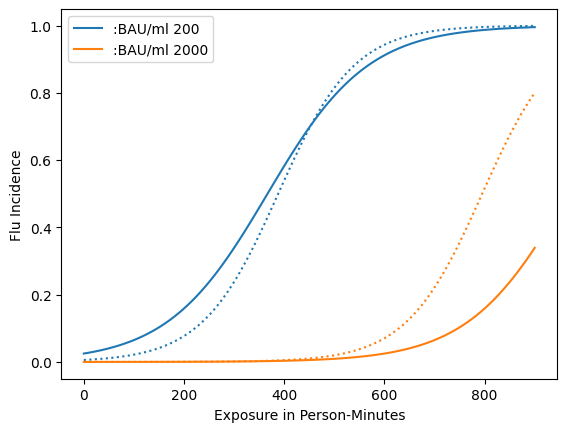

In [5]:
aa = np.linspace(0,900, 101) #This line of code defines how long the x axis is. To limit it to our recorded data, we will set the limit to 900
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for B, col in zip([200,2000], colors):
    plt.plot(aa, 1/(1 + np.exp(-(a * aa + b*B + c))),label=f":BAU/ml {B}", c=col) #True Curves
    plt.plot(aa, lfit.predict_proba(np.vstack([aa, np.repeat(B, len(aa))]).T)[:,1], linestyle=":", c=col) #Code ripped and abstracted from lab, Prediction Curves
plt.xlabel("Exposure in Person-Minutes")
plt.ylabel("Flu Incidence")
plt.legend()